In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
file_path1 = '/content/drive/MyDrive/excel/end_hotel_bookings.csv'
file_path2 = '/content/drive/MyDrive/excel/SVD_Standard.csv'
file_path3 = '/content/drive/MyDrive/excel/SVD_Minmax.csv'

# 파일을 데이터프레임으로 로드
hotel_df1 = pd.read_csv(file_path1)

# 파일을 데이터프레임으로 로드
hotel_df2 = pd.read_csv(file_path2)

# 파일을 데이터프레임으로 로드
hotel_df3 = pd.read_csv(file_path3)

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_2,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,deposit_type_0,deposit_type_1,customer_type_0,customer_type_1,A_C_exist
0,0,0,342,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,737,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,7,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,0,0,13,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5
4,0,0,14,1,1,0,2,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
from sklearn.model_selection import GridSearchCV
import shap

**기본데이터 학습**

In [ ]:
y1 = hotel_df1['is_canceled']
X1 = hotel_df1.drop(columns=['is_canceled'])

# 데이터 분할
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=8)
# Define your AdaBoost model
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              random_state=1)

# Define the parameters grid for grid search
param_grid = {
      'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
}

# Perform grid search with cross-validation
grid_search_1 = GridSearchCV(adaboost, param_grid, refit='roc_auc',cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search_1.fit(X_train_1, y_train_1)

# Get the best parameters and best score
best_params = grid_search_1.best_params_
best_score = grid_search_1.best_score_

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search_1.best_params_)

# 최적의 모델로 테스트 데이터 평가
best_model_1 = grid_search_1.best_estimator_
y_train_pred_1 = best_model_1.predict(X_train_1)
y_pred_1 = best_model_1.predict(X_test_1)

# 평가 지표 출력
print("Test Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Test Precision:", precision_score(y_test_1, y_pred_1))
print("Test Recall:", recall_score(y_test_1, y_pred_1))
print("Test F1:", f1_score(y_test_1, y_pred_1))

print("Train Accuracy:", accuracy_score(y_train_1, y_train_pred_1))
print("Train Precision:", precision_score(y_train_1, y_train_pred_1))
print("Train Recall:", recall_score(y_train_1, y_train_pred_1))
print("Train F1:", f1_score(y_train_1, y_train_pred_1))

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 500}
Test Accuracy: 0.8788380685437636
Test Precision: 0.8627984659161203
Test Recall: 0.7999541179169535
Test F1: 0.8301886792452831
Train Accuracy: 0.9010139618835271
Train Precision: 0.8909002845553067
Train Recall: 0.8372926683547185
Train F1: 0.8632650367393633


**SVD_Standard 데이터 학습**

In [ ]:
y2 = hotel_df2['is_canceled']
X2 = hotel_df2.drop(columns=['is_canceled'])

# 데이터 분할
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=8)
# Define your AdaBoost model
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              random_state=1)

# Define the parameters grid for grid search
param_grid = {
      'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
}

# Perform grid search with cross-validation
grid_search_2 = GridSearchCV(adaboost, param_grid, refit='roc_auc',cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search_2.fit(X_train_2, y_train_2)

# Get the best parameters and best score
best_params = grid_search_1.best_params_
best_score = grid_search_1.best_score_

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search_2.best_params_)

# 최적의 모델로 테스트 데이터 평가
best_model_2 = grid_search_2.best_estimator_
y_train_pred_2 = best_model_2.predict(X_train_2)
y_pred_2 = best_model_2.predict(X_test_2)

# 평가 지표 출력
print("Test Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Test Precision:", precision_score(y_test_2, y_pred_2))
print("Test Recall:", recall_score(y_test_2, y_pred_2))
print("Test F1:", f1_score(y_test_2, y_pred_2))

print("Train Accuracy:", accuracy_score(y_train_2, y_train_pred_2))
print("Train Precision:", precision_score(y_train_2, y_train_pred_2))
print("Train Recall:", recall_score(y_train_2, y_train_pred_2))
print("Train F1:", f1_score(y_train_2, y_train_pred_2))

*SVD_Minmax 데이터 학습**

In [ ]:
y3 = hotel_df3['is_canceled']
X3 = hotel_df3.drop(columns=['is_canceled'])

# 데이터 분할
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=123)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=8)
# Define your AdaBoost model
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              random_state=1)

# Define the parameters grid for grid search
param_grid = {
      'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
}

# Perform grid search with cross-validation
grid_search_3 = GridSearchCV(adaboost, param_grid, refit='roc_auc',cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search_3.fit(X_train_3, y_train_3)

# Get the best parameters and best score
best_params = grid_search_3.best_params_
best_score = grid_search_3.best_score_

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search_3.best_params_)

# 최적의 모델로 테스트 데이터 평가
best_model_3 = grid_search_3.best_estimator_
y_train_pred_3 = best_model_3.predict(X_train_3)
y_pred_3 = best_model_3.predict(X_test_3)

# 평가 지표 출력
print("Test Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Test Precision:", precision_score(y_test_3, y_pred_3))
print("Test Recall:", recall_score(y_test_3, y_pred_3))
print("Test F1:", f1_score(y_test_3, y_pred_3))

print("Train Accuracy:", accuracy_score(y_train_3, y_train_pred_3))
print("Train Precision:", precision_score(y_train_3, y_train_pred_3))
print("Train Recall:", recall_score(y_train_3, y_train_pred_3))
print("Train F1:", f1_score(y_train_3, y_train_pred_3))

Test ROC AUC: 0.9485801477054062


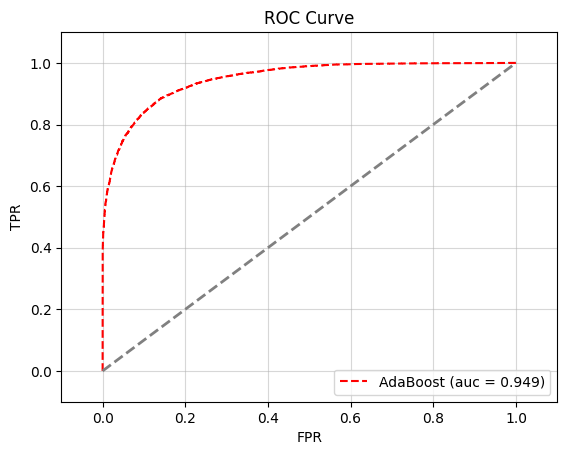

In [ ]:
# ROC Curve and AUC
y_pred_proba = best_model_1.predict_proba(X_test_1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("Test ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)' % ('AdaBoost', roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#background = shap.sample(X_train, 100)  # Using a subset of the training data as the background dataset
#explainer = shap.KernelExplainer(best_model.predict_proba, background)
#shap_values = explainer.shap_values(X_test)

# SHAP summary plot (bar type)
#shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP summary plot (dot type)
#shap.summary_plot(shap_values, X_test)


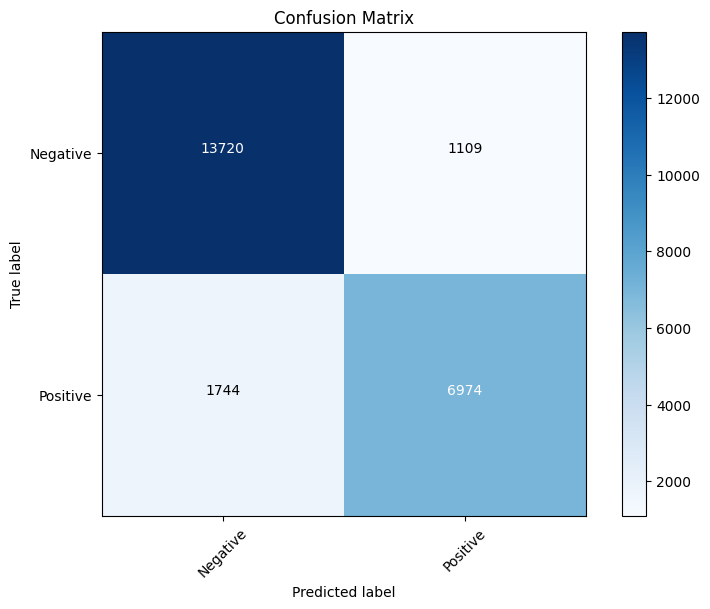

Accuracy: 0.8788380685437636
Precision: 0.8627984659161203
Recall: 0.7999541179169535
F1 Score: 0.8301886792452831


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_1, y_pred_1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test_1)))
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_1, y_pred_1)
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
f1 = f1_score(y_test_1, y_pred_1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)